In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


In [14]:
df = pd.read_pickle('../../datasets/processed/movies.pkl')
df.head()

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income,country_of_origin
0,Avatar: The Way of Water,8.0,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,681081686.0,United States
1,Guillermo del Toro's Pinocchio,7.8,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,71614.0,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,239268602.0,"Japan, United States"
3,The Banshees of Inisherin,8.0,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,40000000.0,19720823.0,"Ireland, United Kingdom, United States"
4,M3gan,6.7,2022,January,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,40000000.0,90776006.5,United States


In [15]:
# Selecionar as colunas Rating e Title
df_ratings = df[['rating', 'title']]

# Obter os 10 filmes com as maiores notas
top_ratings = df_ratings.nlargest(10, 'rating')

# Exibir os resultados
print(top_ratings)

      rating                                          title
1249     9.6                             My Little Princess
1193     9.0                      67th Street, New York, NY
1401     9.0                                The Dark Knight
1903     9.0  The Lord of the Rings: The Return of the King
1200     8.8                                      Inception
84       8.6                                     Drishyam 2
800      8.6                                   Interstellar
45       8.5                                        Kantara
308      8.5                                       Parasite
803      8.5                                       Whiplash


In [16]:
# converta para milhao de dólares
df['budget'] = df['budget'] / 1000000
df['income'] = df['income'] / 1000000


In [17]:
df.head()


,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income,country_of_origin
0,Avatar: The Way of Water,8.0,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350.0,681.081686,United States
1,Guillermo del Toro's Pinocchio,7.8,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35.0,0.071614,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85.9,239.268602,"Japan, United States"
3,The Banshees of Inisherin,8.0,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,40.0,19.720823,"Ireland, United Kingdom, United States"
4,M3gan,6.7,2022,January,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,40.0,90.776006,United States


In [18]:
df['budget'].describe()

count    2000.000000
mean       57.947229
std        56.449556
min         0.000010
25%        20.000000
50%        40.000000
75%        75.000000
max       356.000000
Name: budget, dtype: float64

In [19]:
df.sort_values('budget', ascending=False).head(10)

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income,country_of_origin
305,Avengers: Endgame,8.4,2019,April,PG-13,181,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Evans, Mark Ruffalo, ...","Action, Adventure, Drama",UK,356.0,2797.501328,United States
0,Avatar: The Way of Water,8.0,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350.0,681.081686,United States
405,Avengers: Infinity War,8.4,2018,April,PG-13,149,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Hemsworth, Mark Ruffa...","Action, Adventure, Sci-Fi",UK,321.0,2048.359754,United States
521,Star Wars: Episode VIII - The Last Jedi,6.9,2017,December,PG-13,152,Rian Johnson,"Daisy Ridley, John Boyega, Mark Hamill, Carrie...","Action, Adventure, Fantasy",Bolivia,317.0,1332.698830,United States
535,Justice League,6.1,2017,November,PG-13,120,Zack Snyder,"Ben Affleck, Gal Gadot, Jason Momoa, Ezra Miller","Action, Adventure, Fantasy",Iceland,300.0,657.926987,"United States, Canada, United Kingdom"
123,Zack Snyder's Justice League,8.0,2021,March,R,242,Zack Snyder,"Henry Cavill, Ben Affleck, Gal Gadot, Amy Adams","Action, Adventure, Fantasy",Iceland,300.0,90.776006,United States
1539,Pirates of the Caribbean: At World's End,7.1,2007,May,PG-13,169,Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley, G...","Action, Adventure, Fantasy",USA,300.0,960.996492,United States
316,Star Wars: The Rise Of Skywalker,6.5,2019,December,PG-13,141,J J Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Adam D...","Action, Adventure, Fantasy",Jordan,275.0,1074.149279,United States
420,Solo: A Star Wars Story,6.9,2018,May,PG-13,135,Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...","Action, Adventure, Sci-Fi",Spain,275.0,392.924807,United States
1627,Superman Returns,6.1,2006,June,PG-13,154,Bryan Singer,"Brandon Routh, Kevin Spacey, Kate Bosworth, Ja...","Action, Adventure, Sci-Fi",Australia,270.0,391.081192,"United States, Australia"


In [23]:
df.sort_values('budget', ascending=True).head(10)

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income,country_of_origin
1249,My Little Princess,9.6,2010,September,R,110,Enzo Zelocchi,"Enzo Zelocchi, Charlotte Labadie, David M Edel...","Romance, Drama, Family",Unknown,0.000010,90.776006,United States
487,Trautmann,7.2,2018,October,R,120,Marcus H Rosenm ller,"David Kross, Freya Mavor, John Henshaw, Harry ...","Biography, Drama, Romance",Northern Ireland,0.000012,1.916514,"United Kingdom, Germany"
995,Banshee,8.5,2013,September,R,50,Gemma Mc Carthy,"Jonathan O Dwyer, Sean Flood, Frank Hurley, Fi...",Action,Ireland,0.000321,90.776006,Ireland
1863,Primer,6.8,2004,May,PG-13,77,Shane Carruth,"Shane Carruth, David Sullivan, Casey Gooden, A...","Drama, Sci-Fi, Thriller",USA,0.007000,0.545436,United States
477,The VelociPastor,5.0,2018,August,Unrated,75,Brendan Steere,"Greg Cohan, George Schewnzer, Janice Young, Da...","Action, Adventure, Comedy",USA,0.011000,90.776006,"United States, China"
94,Skinamarink,5.4,2022,January,R,100,Kyle Edward Ball,"Jaime Hill, Lucas Paul, Ross Paul, Dali Rose T...",Horror,Canada,0.015000,90.776006,Canada
1557,Paranormal Activity,6.3,2007,October,R,86,Oren Peli,"Katie Featherston, Micah Sloat, Mark Fredrichs...","Horror, Mystery",USA,0.015000,193.355800,United States
605,Terrifier,5.6,2016,March,Unrated,85,Damien Leone,"Jenna Kanell, Samantha Scaffidi, David Howard ...","Horror, Thriller",Unknown,0.035000,0.076376,United States
910,Coherence,7.2,2013,August,Unrated,89,James Ward Byrkit,"Emily Baldoni, Maury Sterling, Nicholas Brendo...","Drama, Mystery, Sci-Fi",Unknown,0.050000,0.139745,"United States, United Kingdom"
793,Tangerine,7.1,2015,July,R,88,Sean Baker,"Kitana Kiki Rodriguez, Mya Taylor, Karren Kara...","Comedy, Crime, Drama",USA,0.100000,0.840099,United States


In [22]:
df.sort_values('income', ascending=False).head(10)

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income,country_of_origin
1300,Avatar,7.8,2009,December,PG-13,162,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",USA,237.0,2922.917914,United States
305,Avengers: Endgame,8.4,2019,April,PG-13,181,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Evans, Mark Ruffalo, ...","Action, Adventure, Drama",UK,356.0,2797.501328,United States
714,Star Wars: Episode VII - The Force Awakens,7.8,2015,December,PG-13,138,J J Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...","Action, Adventure, Sci-Fi",Ireland,245.0,2069.521700,United States
405,Avengers: Infinity War,8.4,2018,April,PG-13,149,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Hemsworth, Mark Ruffa...","Action, Adventure, Sci-Fi",UK,321.0,2048.359754,United States
103,Spider-Man: No Way Home,8.3,2021,December,PG-13,148,Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...","Action, Adventure, Fantasy",Iceland,200.0,1917.430023,United States
723,Jurassic World,6.9,2015,June,PG-13,124,Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...","Action, Adventure, Sci-Fi",USA,150.0,1671.537444,United States
344,The Lion King,6.8,2019,July,PG,118,Jon Favreau,"Donald Glover, Beyonc , Seth Rogen, Chiwetel E...","Animation, Adventure, Drama",South Africa,260.0,1663.250487,"United States, United Kingdom"
1008,The Avengers,8.0,2012,May,PG-13,143,Joss Whedon,"Robert Downey Jr , Chris Evans, Scarlett Johan...","Action, Adventure, Sci-Fi",USA,220.0,1518.815515,United States
753,Furious 7,7.1,2015,April,PG-13,137,James Wan,"Vin Diesel, Paul Walker, Dwayne Johnson, Jason...","Action, Crime, Thriller",United Arab Emirates,190.0,1515.341399,"United States, China, Japan, Canada, United Ar..."
27,Top Gun: Maverick,8.4,2022,May,PG-13,130,Joseph Kosinski,"Tom Cruise, Jennifer Connelly, Miles Teller, V...","Action, Drama",USA,170.0,1488.732821,United States


In [24]:
bins = [0.1, 5 ,10, 25, 50, 100, 150, 200, 250, float('inf')]
labels = ['0.1-5', '5-10','10-25', '25-50', '50-100', '100-150', '150-200', '200-250', '250+']
df['budget_range'] = pd.cut(df['budget'], bins=bins, labels=labels)

budget_counts = df['budget_range'].value_counts(normalize=True) * 100

print(budget_counts)


25-50      34.824121
50-100     17.487437
10-25      16.432161
100-150     8.542714
0.1-5       8.341709
150-200     6.231156
5-10        5.979899
200-250     1.507538
250+        0.653266
Name: budget_range, dtype: float64


In [27]:
contagem_filmes = df.pivot_table(index='runtime_group', values='income', aggfunc='mean')
contagem_filmes.reset_index()

,runtime_group,income
0,<90,99.872750
1,90-120,141.201511
2,120-150,263.597154
3,150-180,364.034727
4,180-200,693.981019
5,>200,412.734203


In [28]:
df.groupby(['budget_range'])['certificate'].value_counts()

budget_range  certificate
0.1-5         R              127
              Unrated         17
              PG-13           16
              PG               2
              TV-MA            2
                            ... 
250+          TV-G             0
              TV-MA            0
              TV-PG            0
              TV-Y7            0
              Unrated          0
Name: certificate, Length: 99, dtype: int64

In [29]:

df.groupby('budget_range')[
    [
        'month', 'certificate', 
        'directors', 'filming_location', 
        'year', 'country_of_origin'
    ]
].agg(lambda x: x.mode()[0])

,month,certificate,directors,filming_location,year,country_of_origin
budget_range,,,,,,
0.1-5,October,R,Eli Roth,USA,2015,United States
5-10,January,R,Lars von Trier,USA,2016,United States
10-25,January,R,Wes Anderson,USA,2007,United States
25-50,November,R,Joe Wright,USA,2020,United States
50-100,December,PG-13,Antoine Fuqua,USA,2003,United States
100-150,November,PG-13,Shawn Levy,USA,2007,United States
150-200,May,PG-13,David Yates,USA,2021,United States
200-250,May,PG-13,Peter Jackson,USA,2012,United States
250+,December,PG-13,"Anthony Russo, Joe Russo",Iceland,2019,United States


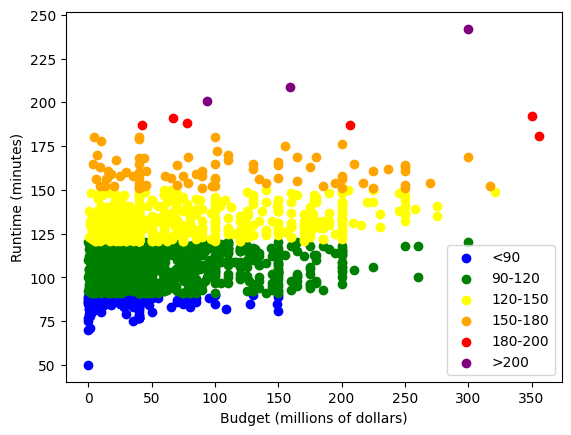

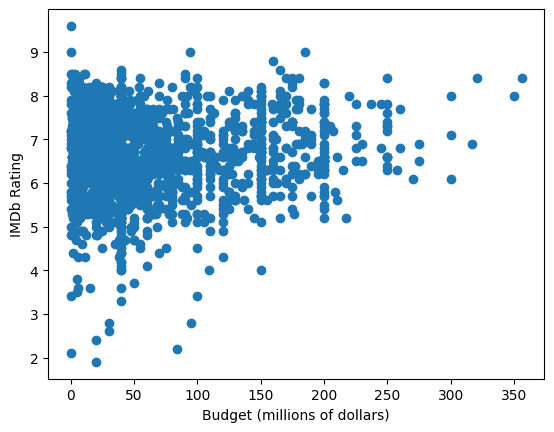

In [30]:
bins = [0, 90, 120, 150, 180, 200, float('inf')]
labels = ['<90', '90-120', '120-150', '150-180', '180-200', '>200']
df['runtime_group'] = pd.cut(df['runtime'], bins=bins, labels=labels)

# Plote um gráfico de dispersão com cada grupo de tempo de execução em uma cor diferente
colors = {'<90': 'blue', '90-120': 'green', '120-150': 'yellow', '150-180': 'orange', '180-200': 'red', '>200': 'purple'}
for runtime_group, color in colors.items():
    plt.scatter(df[df['runtime_group'] == runtime_group]['budget'], df[df['runtime_group'] == runtime_group]['runtime'], c=color, label=runtime_group)

plt.xlabel('Budget (millions of dollars)')
plt.ylabel('Runtime (minutes)')
plt.legend()
plt.show()



plt.scatter(df['budget'], df['rating'])
plt.xlabel('Budget (millions of dollars)')
plt.ylabel('IMDb Rating')
plt.show()


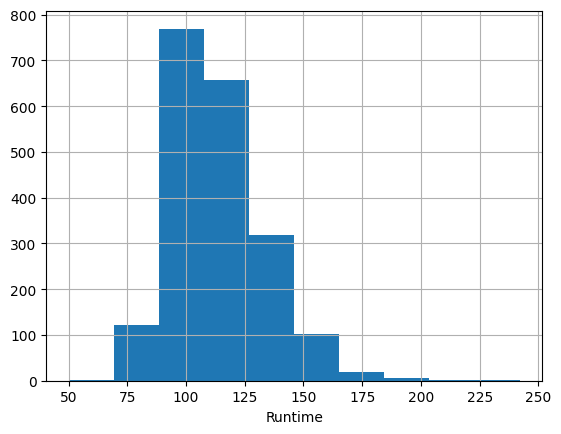

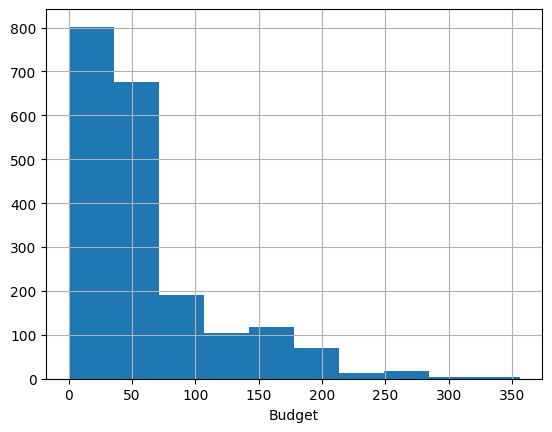

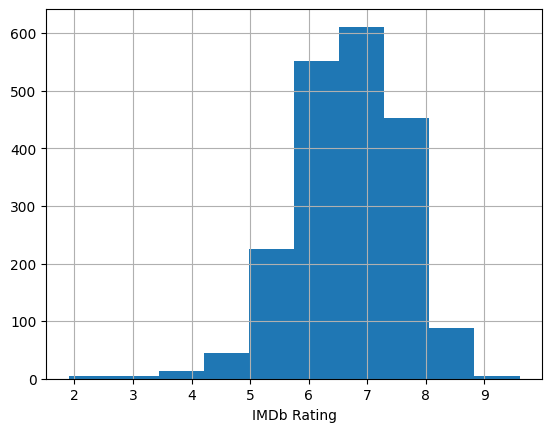

In [31]:
df['runtime'].hist()
plt.xlabel('Runtime')
plt.show()

df['budget'].hist()
plt.xlabel('Budget')
plt.show()

df['rating'].hist()
plt.xlabel('IMDb Rating')
plt.show()


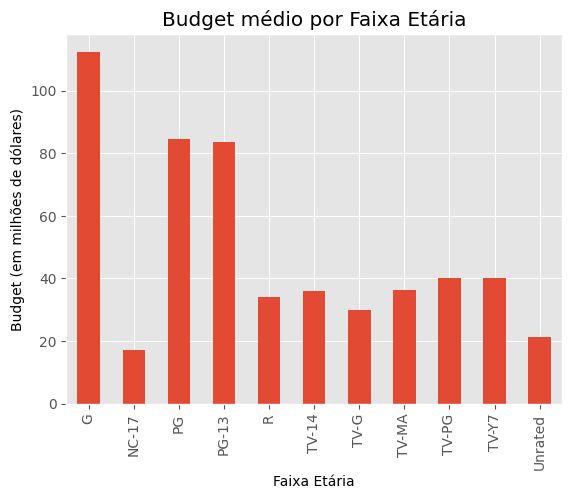

In [32]:
budget_by_cert = df.groupby(['certificate'])['budget'].mean()
plt.style.use('ggplot')
budget_by_cert.plot(kind='bar')
plt.xlabel('Faixa Etária')
plt.ylabel('Budget (em milhões de dólares)')
plt.title('Budget médio por Faixa Etária')
plt.show()

In [65]:
def list_of_str(array: np.ndarray) -> pd.DataFrame:
    new_df = pd.Series(np.sum((array) + ',').split(',')).str.strip()
    test = new_df.copy()
    new_df = pd.DataFrame(list(set(new_df)), columns=[array.name])
    new_df.drop(index=new_df[new_df[array.name] == ''].index, inplace=True)
    new_df.reset_index(drop=True, inplace=True)
    new_df['frequency'] = [test.str.fullmatch(item).sum() for item in tqdm(new_df[array.name].values)]
    new_df['rating'] = [df[df[array.name].str.contains(item)]['rating'].mean() for item in tqdm(new_df[array.name].values)]
    new_df['budget'] = [df[df[array.name].str.contains(item)]['budget'].mean() for item in tqdm(new_df[array.name].values)]
    new_df['runtime'] = [df[df[array.name].str.contains(item)]['runtime'].mean() for item in tqdm(new_df[array.name].values)]
    new_df['income'] = [df[df[array.name].str.contains(item)]['income'].mean() for item in tqdm(new_df[array.name].values)]
    new_df['year'] = [df[df[array.name].str.contains(item)]['year'].values for item in tqdm(new_df[array.name].values)]
    new_df['moviesName'] = [df[df[array.name].str.contains(item)]['title'].values for item in tqdm(new_df[array.name].values)]
    
    return new_df

In [66]:
list_of_directors = list_of_str(df.directors)

100%|██████████| 1151/1151 [00:01<00:00, 810.38it/s]


In [67]:
list_of_directors.sort_values('moviesRating', ascending=False).head(10)


,directors,frequency,moviesRating,moviesBudget,moviesRuntime,moviesIncome,moviesYear,moviesName
438,Abhishek Pathak,1,8.6,40.000000,140.0,2.776721,[2022],[Drishyam 2]
431,Rishab Shetty,1,8.5,2.000000,148.0,2.406221,[2022],[Kantara]
864,Olivier Nakache,1,8.5,10.157948,112.0,426.588510,[2011],[The Intouchables]
1088,Gemma Mc Carthy,1,8.5,0.000321,50.0,90.776006,[2013],[Banshee]
857,ric Toledano,1,8.5,10.157948,112.0,426.588510,[2011],[The Intouchables]
1043,Makoto Shinkai,1,8.4,2.755351,106.0,358.180115,[2016],[Your Name.]
675,Rajkumar Hirani,1,8.4,6.649500,170.0,60.262836,[2009],[3 Idiots]
699,Bob Persichetti,1,8.4,90.000000,117.0,384.256930,[2018],[Spider-Man: Into the Spider-Verse]
318,Darin J Sallam,1,8.4,40.000000,92.0,0.000703,[2021],[Farha]
102,Aamir Khan,1,8.4,40.000000,165.0,21.897373,[2007],[Like Stars on Earth]


In [68]:
# Filtrando diretores com frequência acima de 3
filtered_directors = list_of_directors.query('frequency > 3')

# Classificando os diretores por ordem decrescente de pontuação média de filmes
filtered_directors.sort_values('moviesRating', ascending=False).head(10)

,directors,frequency,moviesRating,moviesBudget,moviesRuntime,moviesIncome,moviesYear,moviesName
690,Christopher Nolan,8,8.325000,156.875000,144.875000,634.222409,"[2020, 2017, 2014, 2012, 2010, 2008, 2006, 2005]","[Tenet, Dunkirk, Interstellar, The Dark Knight..."
607,Damien Chazelle,4,7.875000,42.575000,140.750000,156.584649,"[2022, 2018, 2016, 2014]","[Babylon, First Man, La La Land, Whiplash]"
385,Quentin Tarantino,9,7.866667,56.777778,148.555556,203.548569,"[2019, 2015, 2012, 2009, 2007, 2007, 2005, 200...","[Once Upon a Time in Hollywood, The Hateful Ei..."
924,Martin Scorsese,7,7.828571,105.000000,162.142857,202.494042,"[2019, 2016, 2013, 2011, 2010, 2006, 2004]","[The Irishman, Silence, The Wolf of Wall Stree..."
564,Denis Villeneuve,7,7.828571,69.257143,133.000000,155.769687,"[2021, 2017, 2016, 2015, 2013, 2013, 2010]","[Dune, Blade Runner 2049, Arrival, Sicario, Pr..."
827,Alfonso Cuar n,4,7.800000,86.500000,119.250000,404.361737,"[2018, 2013, 2006, 2004]","[Roma, Gravity, Children of Men, Harry Potter ..."
103,Martin McDonagh,4,7.775000,21.250000,111.500000,63.286441,"[2022, 2017, 2012, 2008]","[The Banshees of Inisherin, Three Billboards O..."
171,Park Chan wook,5,7.680000,5.798515,130.600000,22.371254,"[2022, 2016, 2009, 2005, 2003]","[Decision to Leave, The Handmaiden, Thirst, La..."
380,David Fincher,6,7.666667,74.333333,146.833333,223.038812,"[2020, 2014, 2011, 2010, 2008, 2007]","[Mank, Gone Girl, The Girl with the Dragon Tat..."
494,Bong Joon Ho,6,7.650000,19.642720,126.500000,76.558718,"[2019, 2017, 2013, 2009, 2006, 2003]","[Parasite, Okja, Snowpiercer, Mother, The Host..."


In [83]:
def list_of_str(array: np.ndarray) -> pd.DataFrame:
    new_df = pd.Series(np.sum((array) + ',').split(',')).str.strip()
    test = new_df.copy()
    new_df = pd.DataFrame(list(set(new_df)), columns=[array.name])
    new_df.drop(index=new_df[new_df[array.name] == ''].index, inplace=True)
    new_df.reset_index(drop=True, inplace=True)
    new_df['frequency'] = [test.str.fullmatch(item).sum() for item in tqdm(new_df[array.name].values)]
    new_df['rating'] = [df[df[array.name].str.contains(item)]['rating'].mean() for item in tqdm(new_df[array.name].values)]
    new_df['budget'] = [df[df[array.name].str.contains(item)]['budget'].mean() for item in tqdm(new_df[array.name].values)]
    new_df['runtime'] = [df[df[array.name].str.contains(item)]['runtime'].mean() for item in tqdm(new_df[array.name].values)]
    new_df['income'] = [df[df[array.name].str.contains(item)]['income'].mean() for item in tqdm(new_df[array.name].values)]
    
    return new_df

In [84]:
list_of_genre = list_of_str(df.genre)
list_of_genre


100%|██████████| 20/20 [00:00<00:00, 645.02it/s]


,genre,frequency,rating,budget,runtime,income
0,Horror,262,6.312214,26.597524,103.702290,76.639595
1,Sport,32,6.950000,35.796875,112.781250,83.936080
2,Sci-Fi,213,6.607512,100.853762,117.582160,339.227403
3,Adventure,523,6.617973,114.205245,115.848948,393.139857
4,Family,125,6.348000,77.877165,107.384000,248.792420
5,Crime,332,6.819880,42.191926,115.466867,113.235810
6,History,57,7.150877,40.236243,130.228070,86.821955
7,Mystery,228,6.766228,34.086088,113.135965,96.110483
8,Animation,118,7.022881,101.052792,96.754237,408.207084
9,Comedy,682,6.474340,51.196086,105.159824,160.915253


In [88]:
# Agrupar os dados por gênero e calcular a média do runtime para cada grupo
grouped = list_of_genre.groupby('genre')['runtime'].mean()

# Classificar os resultados em ordem decrescente de tempo de duração médio
list_of_genre.sort_values('rating', ascending=False).head(20)


,genre,frequency,rating,budget,runtime,income
18,Biography,139,7.276978,38.440559,126.107914,108.048774
10,War,22,7.272727,41.748619,122.363636,88.930030
6,History,57,7.150877,40.236243,130.228070,86.821955
8,Animation,118,7.022881,101.052792,96.754237,408.207084
1,Sport,32,6.950000,35.796875,112.781250,83.936080
14,Drama,968,6.933264,39.053801,117.829545,107.266227
16,Western,11,6.863636,45.072727,126.090909,101.297703
12,Music,44,6.855556,36.383962,116.492063,131.906894
5,Crime,332,6.819880,42.191926,115.466867,113.235810
7,Mystery,228,6.766228,34.086088,113.135965,96.110483
